In [6]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df['female'] = np.where(df['Gender'] == 'Male',0,1)

In [10]:
df.drop(columns=['Gender'],inplace=True)

In [11]:
X = df.loc[:,['Age','Annual Income (k$)','female']]
y = df.loc[:,'Spending Score (1-100)']

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [13]:
y_kmeans = kmeans.predict(X)

# get centroids
centers = kmeans.cluster_centers_
print(centers)
# plt.scatter(X[:, 0], X[:, 1],X[:,2],X[:,3], c=y_kmeans, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1],centers[:,2],centers[:3], c='red', s=200, alpha=0.5);


[[42.21904762 40.78095238  0.58095238]
 [35.12631579 82.42105263  0.53684211]]


In [14]:
range_n_clusters = list(np.arange(2,21))

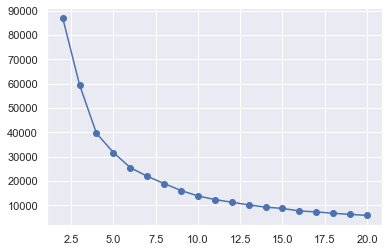

In [15]:
inertiaList = []
for k in range_n_clusters:
    cluster = KMeans(n_clusters=k, random_state=10)
    cluster.fit(X)
    inertiaList.append(cluster.inertia_)

#print(inertiaList)
#sns.set_style("whitegrid")
plt.plot(range_n_clusters,inertiaList)
plt.scatter(range_n_clusters, inertiaList)



In [16]:
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
      "For n_clusters =",
      n_clusters,
      "The average silhouette_score is :",
      silhouette_avg,
  )

For n_clusters = 2 The average silhouette_score is : 0.4259331203289506
For n_clusters = 3 The average silhouette_score is : 0.4250534215103805
For n_clusters = 4 The average silhouette_score is : 0.4324264715962623
For n_clusters = 5 The average silhouette_score is : 0.402024752487894
For n_clusters = 6 The average silhouette_score is : 0.3953677433870493
For n_clusters = 7 The average silhouette_score is : 0.38358853435219536
For n_clusters = 8 The average silhouette_score is : 0.3899287918419527
For n_clusters = 9 The average silhouette_score is : 0.3946819379154393
For n_clusters = 10 The average silhouette_score is : 0.4135145816203753
For n_clusters = 11 The average silhouette_score is : 0.410148031611008
For n_clusters = 12 The average silhouette_score is : 0.4159867104300878
For n_clusters = 13 The average silhouette_score is : 0.416603306457899
For n_clusters = 14 The average silhouette_score is : 0.4141641474200479
For n_clusters = 15 The average silhouette_score is : 0.40423